# Lab 11

In [ ]:
FIRST_NAME = "Leng"
LAST_NAME = "Her"
STUDENT_ID = "5445877"

## Introduction

In this lab we will solve the [diet](https://www.gurobi.com/documentation/10.0/examples/diet_py.html) problem, or otherwise known as "Mix and Blend". Traditionally this problem is trying to decide which foods to include in a diet to try to meet various specifications. In this lab, we will mix and blend various different types of wines to make a blend that meets our quality and cost specifications.


## The Data Set

**Data Description**

This lab uses an open source data set about wine quality from the UCI Machine Learning [repository](https://archive.ics.uci.edu/ml/datasets/wine+quality). It was originally used in the paper [Cortez et al., 2009](https://www.sciencedirect.com/science/article/pii/S0167923609001377?casa_token=1yygWjNDqUUAAAAA:FaqBD1OC9JUoJDRPbnJ9gMyG93R0IpXCTBMZRGrMCLSVI0rcKPSGLHXw2UkgrSQJ9iIBOKgA). The 2 datasets are separated into red and white wines and includes columns related to the physicochemical inputs and average subjective quality ratings. Cost information was excluded from the open source data so we will simulate that parameter below.

*Acknowledgements*

> P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

**Data Dictionary**

More information about the data set is also available on [Kaggle](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009).



| Column Name | Type | Description |
| :----------- | :-- | :----------- |
| fixed acidity | `float` | physicochemical input |
| volatile acidity | `float` | physicochemical input |
| citric acid | `float` | physicochemical input |
| residual sugar' | `float` | physicochemical input |
| chlorides | `float` | physicochemical input |
| free sulfur dioxide | `float` | physicochemical input |
| total sulfur dioxide | `float` | physicochemical input |
| density | `float` | physicochemical input |
| pH | `float` | physicochemical input |
| sulphates | `float` | physicochemical input |
| alcohol | `float` | physicochemical input |
| quality | `int` | 0-10 quality output |


**Data Sample**

|    |   fixed acidity |   volatile acidity |   citric acid |   residual sugar |   chlorides |   free sulfur dioxide |   total sulfur dioxide |   density |   pH |   sulphates |   alcohol |   quality |
|---:|----------------:|-------------------:|--------------:|-----------------:|------------:|----------------------:|-----------------------:|----------:|-----:|------------:|----------:|----------:|
|  0 |             7.4 |               0.7  |          0    |              1.9 |       0.076 |                    11 |                     34 |    0.9978 | 3.51 |        0.56 |       9.4 |         5 |
|  1 |             7.8 |               0.88 |          0    |              2.6 |       0.098 |                    25 |                     67 |    0.9968 | 3.2  |        0.68 |       9.8 |         5 |
|  2 |             7.8 |               0.76 |          0.04 |              2.3 |       0.092 |                    15 |                     54 |    0.997  | 3.26 |        0.65 |       9.8 |         5 |
|  3 |            11.2 |               0.28 |          0.56 |              1.9 |       0.075 |                    17 |                     60 |    0.998  | 3.16 |        0.58 |       9.8 |         6 |
|  4 |             7.4 |               0.7  |          0    |              1.9 |       0.076 |                    11 |                     34 |    0.9978 | 3.51 |        0.56 |       9.4 |         5 |
|  5 |             7.4 |               0.66 |          0    |              1.8 |       0.075 |                    13 |                     40 |    0.9978 | 3.51 |        0.56 |       9.4 |         5 |
|  6 |             7.9 |               0.6  |          0.06 |              1.6 |       0.069 |                    15 |                     59 |    0.9964 | 3.3  |        0.46 |       9.4 |         5 |
|  7 |             7.3 |               0.65 |          0    |              1.2 |       0.065 |                    15 |                     21 |    0.9946 | 3.39 |        0.47 |      10   |         7 |
|  8 |             7.8 |               0.58 |          0.02 |              2   |       0.073 |                     9 |                     18 |    0.9968 | 3.36 |        0.57 |       9.5 |         7 |
|  9 |             7.5 |               0.5  |          0.36 |              6.1 |       0.071 |                    17 |                    102 |    0.9978 | 3.35 |        0.8  |      10.5 |         5 |

In [1]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

--2023-04-16 18:18:01--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  82.23K   315KB/s    in 0.3s    

2023-04-16 18:18:02 (315 KB/s) - ‘winequality-red.csv’ saved [84199/84199]

--2023-04-16 18:18:02--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [application/x-httpd-php]
Saving to: ‘winequality-white.csv’

winequality-white.c 100%[======

## Setup

In [17]:
import os
import pandas as pd
import numpy as np

#### Download data

In [18]:
# Read files into data frames
red_df = pd.read_csv("winequality-red.csv", sep=";")
white_df = pd.read_csv("winequality-white.csv", sep=";")

In [19]:
red_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [20]:
# Simulate wine costs
np.random.seed(4062)
red_df["cost"] = 2 * np.sqrt(np.exp(red_df["quality"] + np.random.randn(len(red_df))))
white_df["cost"] = 2 * np.sqrt(np.exp(white_df["quality"] + np.random.randn(len(white_df))))

#### Configure Gurobi Solver

Follow the instructions on Canvas to download an academic Gurobi license. Upload the `gurobi.lic` file to this Colab Noteboook. Then run the following piece of code to install and authenticate the solver package.

In [21]:
! pip install gurobipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
os.environ['GRB_LICENSE_FILE'] = f'{os.getcwd()}/gurobi.lic'

## Question 1
### EDA

Create histogram plots for each variable in the data set to visualize their distributions. Overlap the red and white datasets on the same plots to see the difference between the two types of wines.

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

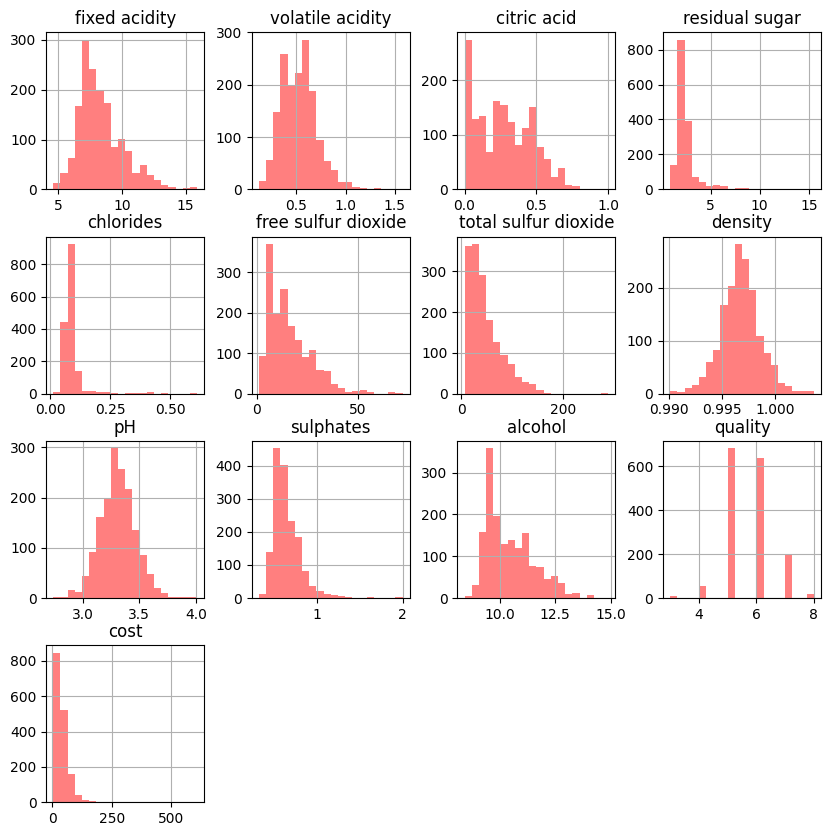

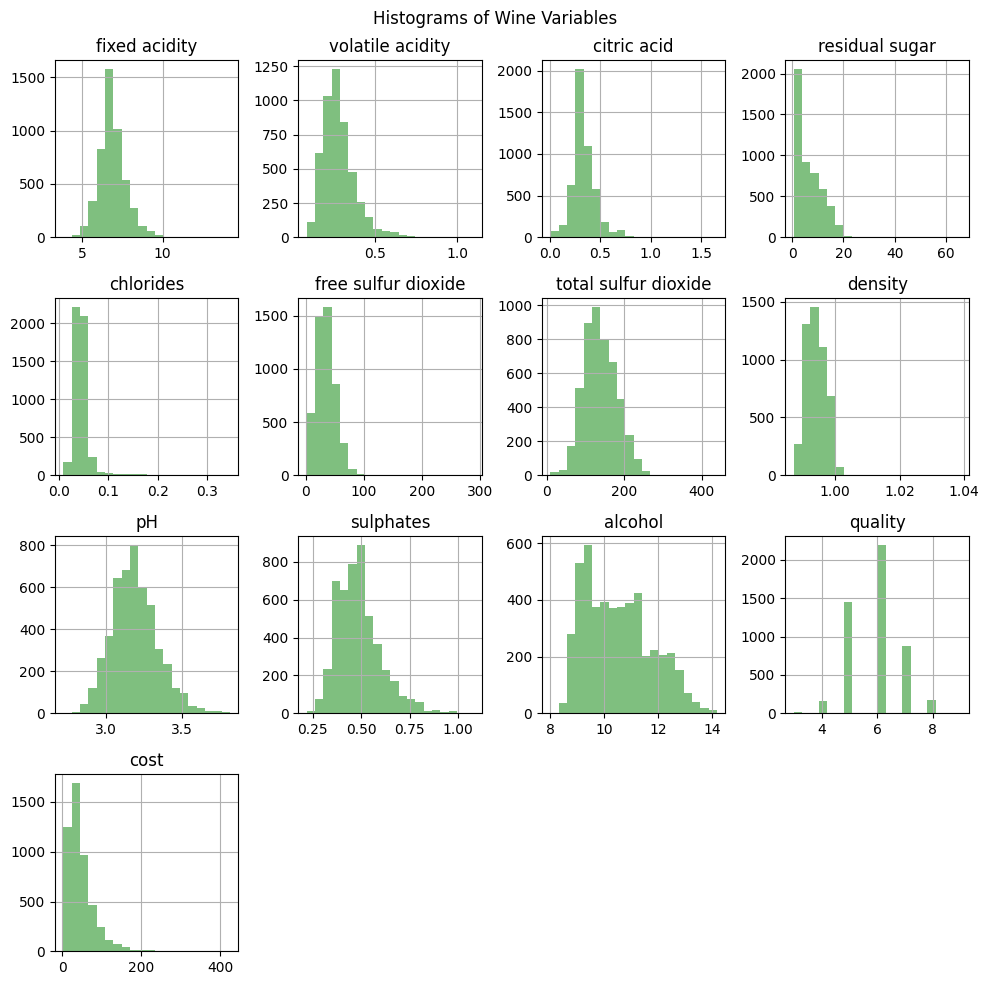

In [25]:
# Create histogram plots for each variable
red_df.hist(alpha=0.5, color='red', bins=20, figsize=(10,10))
white_df.hist(alpha=0.5, color='green', bins=20, figsize=(10,10))

# Add titles and labels
plt.suptitle("Histograms of Wine Variables")
plt.tight_layout()
plt.show()


## Mathematical Formulations



#### Sets
* Set of all wines - $w \in W$
* Set of all traits - $t \in T$

#### Parameters
* Cost of wine w - $C_w$
* Amount of train t in wine w - $ A_{tw} $
* Minimum amount of trait t in the final blend - $L_t$
* Maximum amount of trait t in the final blend - $U_t$

#### Variables
* $X_w$ - percent of blend that comes from wine w

#### Constraints

The percentage totals for the wines must add up to 100%

$$
\sum_W X_w = 1
$$

Each variable must be within the upper and lower bounds

$$
L_t \le \sum_W A_{wt} \cdot X_w \le U_t \qquad \forall t \in T
$$


#### Objective Function
$$
\sum_W C_w \cdot X_w
$$

## Question 2
### Solving

Find the optimal solution to the linear program above using the data from the red wine data set and the parameters below.

In [27]:
from gurobipy import GRB, Model, quicksum

Define Model

In [28]:
# Define Model
model = Model('wine_blend')

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2366536
Academic license - for non-commercial use only - registered to her00024@umn.edu


Sets

In [31]:
wines = red_df.index.tolist()
traits = red_df.drop(columns=["quality", "cost"]).columns.tolist()

Parameters

In [51]:
## Parameters

# Minimum
min_values = {
    'fixed acidity': 5,
    'volatile acidity': 0.1,
    'citric acid': 0,
    'residual sugar': 1.2,
    'chlorides': 0.012,
    'free sulfur dioxide': 1,
    'total sulfur dioxide': 6,
    'density': 0.99,
    'pH': 2.74,
    'sulphates': 0.33,
    'alcohol': 8.4
}

# Maximum
max_values = {
    'fixed acidity': 15.9,
    'volatile acidity': 1.58,
    'citric acid': 1,
    'residual sugar': 15.5,
    'chlorides': 0.611,
    'free sulfur dioxide': 72,
    'total sulfur dioxide': 289,
    'density': 1.00369,
    'pH': 4.01,
    'sulphates': 2,
    'alcohol': 14.9
}


Variables

In [45]:
x = model.addVars(wines, name="wine")

Constraints

In [46]:
# Constraints
model.addConstr(quicksum(x[wine] for wine in wines) == 1, name="total_percentage")


<gurobi.Constr *Awaiting Model Update*>

In [52]:
for trait in traits:
    model.addConstr(
        quicksum(red_df.loc[wine, trait] * x[wine] for wine in wines) >= min_values[trait],
        name=f"min_{trait}"
    )
    model.addConstr(
        quicksum(red_df.loc[wine, trait] * x[wine] for wine in wines) <= max_values[trait],
        name=f"max_{trait}"
    )

Objective

In [55]:
# Objective Function
Cw = red_df['cost'].to_dict()
model.setObjective(quicksum(Cw[i] * x[i] for i in wines), GRB.MINIMIZE)

Optimize

In [56]:
# Optimize
model.optimize()

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Academic license - for non-commercial use only - registered to her00024@umn.edu
Optimize a model with 68 rows, 3198 columns and 107808 nonzeros
Model fingerprint: 0xb627aa1c
Coefficient statistics:
  Matrix range     [1e-02, 3e+02]
  Objective range  [4e+00, 6e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-02, 3e+02]
Presolve removed 46 rows and 484 columns
Presolve time: 0.11s
Presolved: 22 rows, 2728 columns, 29636 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.4388337e+00   4.415444e+01   0.000000e+00      0s
      18    4.4388337e+00   0.000000e+00   0.000000e+00      0s

Solved in 18 iterations and 0.17 seconds (0.04 work units)
Optimal objective  4.438833742e+00


In [58]:
# Print Solution
#print("Optimal Blend:")
#for wine in wines:
    #print(f"{wine}: {x[wine].x*100:.2f}%")
#print(f"\nTotal Cost: ${model.objVal:.2f}")